In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
decimation = pd.read_csv("Decimation.csv")
inversion = pd.read_csv("PTI_Inversion.csv")
inversion_without_error_function = pd.read_csv("PTI_Inversion_without_error_function.csv")

In [380]:
dc = decimation["DC CH1"] + decimation["DC CH2"] + decimation["DC CH3"]

dc_scaled_detector_1 = 2 * (decimation["DC CH1"] - 0.053) / (3.751 - 0.053) - 1
dc_scaled_detector_2 = 2 * (decimation["DC CH2"] - 0.013) / (1.466 - 0.013) - 1
dc_scaled_detector_3 = 2 * (decimation["DC CH3"] - 0.07) / (3.21 - 0.07) - 1
dc = dc_scaled_detector_1 + dc_scaled_detector_2 + dc_scaled_detector_3
plt.plot(range(len(decimation)), dc)
plt.plot(0, 0)
plt.grid()
plt.show()

In [26]:
def detector(phase, outputphase, min_intensity, max_intensity):
    scaled = np.cos(phase - outputphase)
    return (max_intensity - min_intensity) / 2 * scaled + (max_intensity + min_intensity) / 2

# DC Signals

## Detector 1

In [373]:
%matplotlib tk
plt.plot(range(len(decimation)), decimation["DC CH1"], label="DC Signal")
plt.plot(range(len(decimation)), detector(inversion["Interferometric Phase"], 0, min_intensity=0.053, max_intensity=3.751), label="Algorithm")
plt.plot(range(len(decimation)), detector(inversion_without_error_function["Interferometric Phase"], 0, min_intensity=0.053, max_intensity=3.751),
         label="First Guess")
plt.legend(fontsize=11)
plt.grid()
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Intensity [V]", fontsize=11)
plt.show()

## Detector 2

In [375]:
plt.plot(range(len(decimation)), decimation["DC CH2"], label="DC Signal")
plt.plot(range(len(decimation)), detector(inversion["Interferometric Phase"], 1.84, min_intensity=0.013, max_intensity=1.466), label="Algorithm")
#plt.plot(range(len(decimation)), detector(inversion_without_error_function["Interferometric Phase"], 1.84, min_intensity=0.013, max_intensity=1.466), label="First Guess")
plt.legend(fontsize=11)
plt.grid()
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Intensity [V]", fontsize=11)
plt.show()

## Detector 3

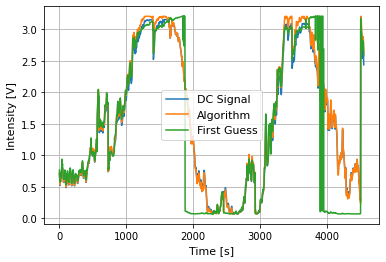

In [54]:
plt.plot(range(len(decimation)), decimation["DC CH3"], label="DC Signal")
plt.plot(range(len(decimation)), detector(inversion["Interferometric Phase"], 3.73, min_intensity=0.07, max_intensity=3.21), label="Algorithm")
plt.plot(range(len(decimation)), detector(inversion_without_error_function["Interferometric Phase"], 3.73, min_intensity=0.07, max_intensity=3.21),
         label="First Guess")
plt.legend(fontsize=11)
plt.grid()
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Intensity [V]", fontsize=11)
plt.show()

In [368]:
import networkx as nx
phase_graph = nx.Graph(directed=True)
roots = []
for i in range(1, 6):
    phase_graph.add_node(round(i * 2 * np.pi / 6, 2))
    roots.append(round(i * 2 * np.pi / 6, 2))

In [361]:
phase = [0, 1, 2, 3, 4, 5, 5.5]

In [371]:
for i in range(0, 4):
    k = int(6 * phase[i] / (2 * np.pi))
    phase_graph.add_edge(roots[k - 1], i)

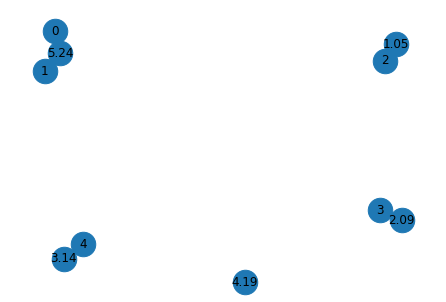

In [372]:
nx.draw_spring(phase_graph, node_size=600, with_labels=True)
plt.savefig("graph.pdf", dpi=400)

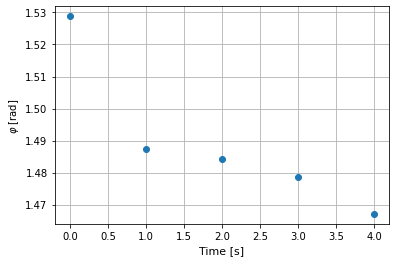

In [359]:
plt.plot(range(5), inversion["Interferometric Phase"][:5], "o")
plt.grid()
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel(r"$\varphi$ [rad]")
plt.savefig("phase_for_graph.pdf", dpi=400, bbox_inches='tight')